In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

In [6]:
data = pd.read_csv("exam.csv")
data.head()

,hours,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   20 non-null     float64
 1   pass    20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [23]:
X = data[['hours']]
X.head()

,hours
0,0.50
1,0.75
2,1.00
3,1.25
4,1.50


In [24]:
y = data[['pass']]
y.head()

,pass
0,0
1,0
2,0
3,0
4,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
from sklearn.utils.validation import column_or_1d
clf.fit(X_train, column_or_1d(y_train)) #bien doi y_train tu dataframe ve 1d de tinh toan

LogisticRegression()

In [31]:
clf.coef_

array([[0.95194818]])

In [33]:
#tinh toan xac suat cua lop cho tap du lieu thi nghiem bang cach su dung predict_proba
#cot 0 la gtri 0, cot 1 la gia tri 1
clf.predict_proba(X_test)

array([[0.82270134, 0.17729866],
       [0.11557193, 0.88442807],
       [0.52668346, 0.47331654],
       [0.742458  , 0.257542  ],
       [0.17377956, 0.82622044]])

In [36]:
y_predict = clf.predict(X_test)
y_predict

array([0, 1, 0, 0, 1], dtype=int64)

In [37]:
y_test


,pass
3,0
18,1
10,1
5,0
16,1


In [39]:
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test, y_predict)* 100 , "%")

Accuracy is  80.0 %


In [41]:
#kiem tra model co bi orverfitting hay underfitting hay ko
clf.score(X_train, y_train)

0.7333333333333333

In [47]:
clf.score(X_test, y_test)

0.8

In [48]:
# mo hinh co 2 diem cua tap train va test gan bang nhau, mo hinh khong bi over hoac under

In [49]:
X_now = [[1.5], [4.4]]
y_now = clf.predict(X_now)
y_now

array([0, 1], dtype=int64)

In [50]:
clf.coef_

array([[0.95194818]])

In [52]:
clf.intercept_

array([-2.72469281])

In [58]:
#visualization
X_new = np.linspace(0,6,1000).reshape(-1,1) #reshape lai du lieu cho giong series
y_proba = clf.predict_proba(X_new)
y_proba[:10,]

array([[0.93846808, 0.06153192],
       [0.9381371 , 0.0618629 ],
       [0.93780445, 0.06219555],
       [0.93747013, 0.06252987],
       [0.93713414, 0.06286586],
       [0.93679646, 0.06320354],
       [0.9364571 , 0.0635429 ],
       [0.93611603, 0.06388397],
       [0.93577326, 0.06422674],
       [0.93542878, 0.06457122]])

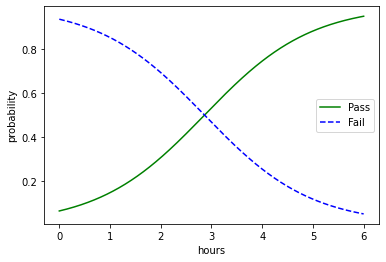

In [60]:
plt.plot(X_new, y_proba[:,1], "g-", label ="Pass")
plt.plot(X_new, y_proba[:,0], "b--", label ="Fail")
plt.legend()
plt.xlabel("hours")
plt.ylabel("probability")
plt.show()